# Week 9: Networks 1


A network is a way to represent a system of things that interact or are interrelated in some fashion. It could just be your facebook network, that's obvious, but a network can also represent the interaction patterns of proteins in the human body, who votes what on whose bill in the US Senate, the mutually attractive forces between galaxies in the universe or just about anything else that you can possibly imagine. This week we will get started on some of the fundamental concepts, and then look closer at some Facebook data. In the exercises today you will:

* Get warmed up to thinking about systems as networks
* Learn to use the `NetworkX` library
* Explore a Facebook network

# Lecture

In [1]:
# ----------------- !
# Execute this cell !
# ----------------- !

from IPython.display import HTML

def video_html(url):
    return f"""
    <div align="middle">
    <video width="50%" controls>
      <source src="{url}" type="video/mp4">
    </video></div>"""

HTML(video_html('https://www.dropbox.com/s/43ya0a9jmaa6exk/slides_week9_mov.m4v?raw=1'))

## Imports

In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx           # pip install networkx
import pandas as pd
from collections import Counter
from netwulf import visualize   # pip install netwulf

## Exercises

### Part 0: Networks

Questions for chapter 1 and 2 of [Network Science](http://barabasi.com/networksciencebook/).

> **Ex. 9.0.1**: List three different real networks and state the nodes and links for each of them.

 - Computer networks. Each node is a computer (or device) and each has multiple links. ssh would be a bidirectional link whereas http would be mostly unidirectional (not exactly true...)
 
 - The metroline is a network, with many stations (nodes) where most would only have two links (tracks) , but some have and act as central hubs.
 
 - Food chains. Each animal (or plant) is a node and the links state which animals eats what.

> **Ex. 9.0.2**: What networks are you personally most interested in. Address the following questions:
>   * What are its nodes and links? 
>   * How large is it? 
>   * Can be mapped out? 
>   * Why do you care about it? 

I'm not that into networks, that I have a favourite, but I think that digitalization (and tracking) of social networks trough social networks and online messaging systems are important because there is such a potential for abuse.

A person (or more precise an user, but this can be collapsed to a person) is a node and a message, or interaction between two persons is a link.

The network is finite, and could therefore be mapped, but mapping 7 billion people with tens to thousand of connections might not be practical.

> **Ex. 9.0.3**: In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book. 

As mentioned in section 1.5 and in my previous answer I tink that the networks used in tracking of online activities (hopefully) will have a positive impact trough rethinking of privacy laws (citizen ownership over own data/right to be forgotten/etc.) and patent laws. Alternatively we could find ourself in a very skewed socity where a select few own the majority of data for a huge economic gain. 

> **Ex. 9.0.4**: Section 2.5 states that real networks are sparse. Can you think of a real network where each node has *many* connections? Is that network still sparse? If yes, can you explain why?

One of the real networks mentioned is the social network where most people have a thousands of connections, but is still far from complete. A complete network i can think of is a single router network where (if one does not  think of the router as a node) every node is connected at all the others, i.e. complete.

### Part 1: The `NetworkX` library

`NetworkX` is the Python library we will be using for working with networks. It should come installed with your Anaconda distribution, but you wont know how to use it yet. The best way to get familiar is to work through a tutorial. That's what the following exercises are about.

> **Ex. 9.1.1**: Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial.html). Read the first few sections about nodes, edges and attributes. Write an example below where you create a graph, `G`, and then:
1. add some nodes and edges to,
2. print its nodes and edges
3. delete a node, and
4. plot it.

The graph has the nodes [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 
and the edges [(0, 1), (0, 2), (0, 5), (0, 8), (1, 6), (1, 4), (2, 7), (2, 5), (3, 8), (4, 5), (4, 7), (4, 8), (4, 6), (5, 6), (5, 9), (6, 7), (7, 9)]


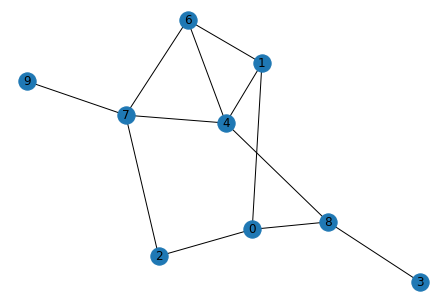

In [3]:
import numpy as np
# Init graph
G = nx.Graph()

# add notes
G.add_nodes_from([ i for i in range(10)])

# add edges with two random connection. Some nodes can have zero connections
# if only drawing connections to self
G.add_edges_from([ (i, np.random.randint(0,10)) for i in range(10) ])
G.add_edges_from([ (i, np.random.randint(0,10)) for i in range(10) ])

# print
print(f"""The graph has the nodes {G.nodes} \nand the edges {G.edges}""")

# delete a random node
G.remove_node(np.random.randint(0,10))

# plot
nx.draw(G, with_labels=True)

> **Ex. 9.1.2**: `NetworkX` has lots of functions to generate synthetic networks. One of the most famous types of synthetic networks is called an Erdős–Rényi (ER) network.
1. Describe what an ER network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating an ER network. Create one with $N=100$ nodes and probability of edge creation $p=0.1$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created ER graph.
    * A node's *degree* is the number of other nodes it is connected to.
    * The *degree distribution* is a histogram which shows the distribution of node degrees.

The ER network is a random graph of size $N$ where each node has a fixed probability of being connected. It is created by creating N isolated nodes and then iterating over all the posible connections and randomly including or excluding each connection with a fixed probability $p$.

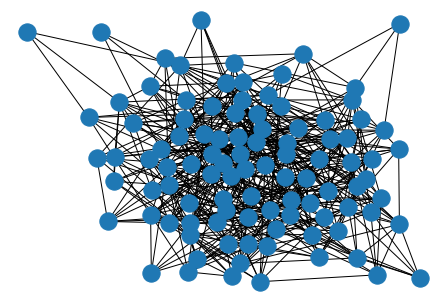

In [4]:
er = nx.erdos_renyi_graph(100, 0.1)
nx.draw(er)

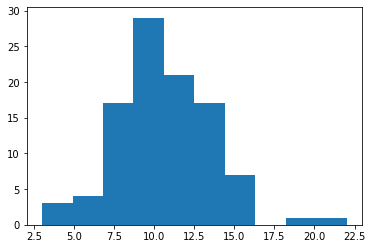

In [5]:
def degreeDist(G):
    # degree sequence stolen from the networkx docs
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    plt.hist(degree_sequence)
    
degreeDist(er)

> **Ex. 9.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.
1. Describe what a BA network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.
5. Explain the main difference(s) you observe, when comparing to the ER network.
6. Are there other measures we could have used to describe the ER and BA networks further?

The BA network is a scale-free or power law type network. The networks is created by a set of initial connections of m nodes, next new nodes are added one at a time with a probability of being connected to a given node with a probability that is proportional to the size of the graph.

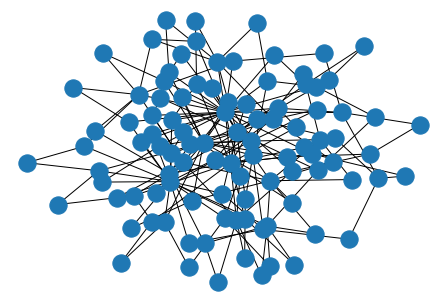

In [6]:
ba = nx.barabasi_albert_graph(100, 2)
nx.draw(ba)

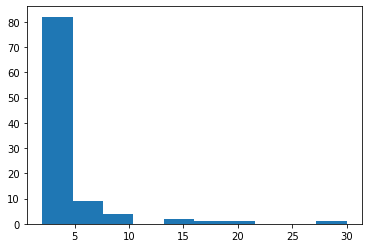

In [7]:
degreeDist(ba)

We see that the BA degree distribution is approximately a power law distribution with a few very connected, where the ER network shows a more even distibuation with a few low degree nodes, and a few high degree nodes and the rest spread between.

We can also se this with the ER network being more densely connected in the center (many high degree nodes) where the BA network is more evenly spread with the two initial nodes being highly connected.

### Part 2: Facebook network

Now that you know how to build a network in `NetworkX`, visualize it and plot some statistics, you are ready to analyze today's dataset. We will be using [this facebook dataset](http://socialnetworks.mpi-sws.org/data-wosn2009.html) collected by the researchers at the Max Planck Institute. Go ahead and download the list of wall posts. Put the file in the same directory as this notebook and load it like:

In [8]:
import urllib
urllib.request.urlretrieve("http://socialnetworks.mpi-sws.mpg.de/data/facebook-wall.txt.gz", "facebook-wall.gz")

('facebook-wall.gz', <http.client.HTTPMessage at 0x134c71c6d08>)

In [9]:
# work outside of jupyter why???
import gzip
with gzip.open('facebook-wall.gz') as f:
    data = pd.read_csv(f,
        delimiter="\t",
        header=None,
        names=['user1', 'user2', 'timestamp']
)

data.head(10)

,user1,user2,timestamp
0,28,28,1095135831
1,1015,1017,1097725406
2,959,959,1098387569
3,991,991,1098425204
4,1015,1017,1098489762
5,1015,1017,1098673897
6,3368,3368,1098755376
7,14752,14736,1099526971
8,1015,1017,1099602800
9,1531,1080,1099889279


As you can see this is a *temporal network* (in that edges are timestamped). Time is given in UNIX timestamps. Though there are ways to model such
a network in its entire complexity, we'll start simple and just take a slice of it out and treat that as a static
network. You can create a `nx.DiGraph` from a slice of time like:

In [10]:
t0 = data.timestamp.max() - 86400 * 7  # Lower bound of time-slice (here: 7 days before last wall post)
t1 = data.timestamp.max()              # Upper bound of time-slice

# Subset of the pandas dataframe
data_t = data.loc[data.timestamp.between(t0, t1)]

# Count the number of times each link occurs and store that in a new 'weight' column
data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

# Create a `nx.DiGraph` from this dataframe
G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)

> **Ex: 9.2.1**: Convert the above sample code into a function where you can easily input `t0` and `t1` of the slice, and get a `nx.DiGraph` in return. Create the aggregated network for the last 365 days of the data. Print the number of nodes and edges.

In [11]:
def createGraff(data, t0=None, t1=None):
    """Creates a networkx DiGraph from a pandas dataframe and two timestamps
    returns a nx graph.
    data: pandas df with columns [user1, user2, timestamp]
    t0: timestamp. Default last seven days
    t1 timestamp default last day.
    """
    if t0 is None:
        t0 = data.timestamp.max() - 86400 * 7
    if t1 is None:
        t1 = data.timestamp.max()              
    data_t = data.loc[data.timestamp.between(t0, t1)]
    data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')
    return nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)

In [84]:
fg = createGraff(data, t0=data.timestamp.max()-86400 * 365)

In [13]:
print(f"""Number of nodes: {fg.number_of_nodes()}\nNumber of edges: {fg.number_of_edges()}""")

Number of nodes: 44397
Number of edges: 201632


> **Ex: 9.2.2**: Since it's a directed network, there are two degree distributions we can plot: one for the
in-degrees and another for the out-degrees. Plot them both in the same figure (remember to add a legend).
The distribution is very heavy-tailed, so you may want to log-scale both axes. Comment on the result. Does
it resemble any of the network models you know?
>
> *Hint: use `Counter` to count how many times each degree-value occurs and then scatter plot the degree-values
against counts. When you log-scale the axes, zero values cause trouble, so you should remove the data point for
degree 0.*

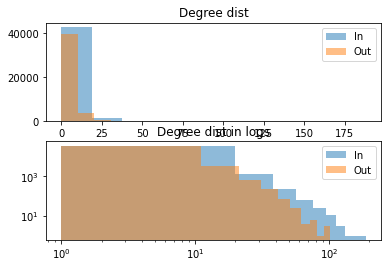

In [14]:
def filterList(l, remove_me=0):
    filtered = list(filter((remove_me).__ne__, l))
    return filtered

def dirDegreeDist(G, use_log=True):
    indegrees = sorted([d for n, d in G.in_degree()], reverse=True)
    outdegrees = sorted([d for n, d in G.out_degree()], reverse=True)
    if use_log:
        # remove 0 and take logs
        indegrees = filterList(indegrees)
        outdegrees = filterList(outdegrees)

    plt.hist(indegrees, alpha=.5, label="In")
    plt.hist(outdegrees, alpha=.5, label="Out")
    if use_log:
        plt.yscale('log', nonposy='clip')
        plt.xscale('log')
        plt.title("Degree dist in logs")
    else:
        plt.title("Degree dist")
    plt.legend()
    
plt.subplot(2,1,1)
dirDegreeDist(fg, use_log=False)
plt.subplot(2,1,2)
dirDegreeDist(fg, use_log=True)

The above dist plots look like the powerlaw distribution seen in the BA graph!

> **Ex: 9.2.3**: Using a histogram plot the distribution of (weighted) local clustering coefficients ([docs](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering)). Which distribution does it appear to follow?
>
> *Hint: figure out how to plot a histogram with logarithmic bins.*

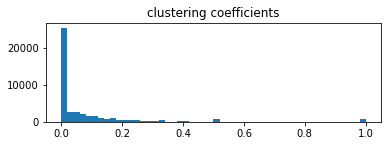

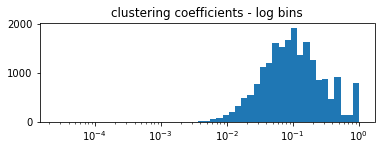

In [62]:
def clusteringDist(G, nbins=50, use_log=True):
    """Plot histogram of the local clustering degrees
    Returns: None (plots graph)
    Parmats:
    G: networkx graph
    """
    # Get degrees, do reverse sort
    cl = nx.clustering(G)
    wlc = np.fromiter(nx.clustering(G).values(), dtype=float)
    wlc_sorted = -np.sort(-wlc)
    if use_log:
        # create logbins from min and max degrees. Add small constant to fix log(0)
        bins = np.logspace(np.log(wlc_sorted[-1]+.01),np.log(wlc_sorted[0]+.01), nbins)
        plt.gca().set_xscale("log")
        plt.title("clustering coefficients - log bins")
    else:
        bins = nbins
        plt.title("clustering coefficients")
    plt.hist(wlc, bins=bins)
    plt.show()

plt.subplot(2,1,1)
clusteringDist(fg, use_log=False)
plt.subplot(2,1,2)
clusteringDist(fg, use_log=True)

The clustering degrees does also apear to be a power law distribution.

We want to plot the network so we can visually get a feeling for how people are connected. `networkx`'s `nx.draw` method won't cut it here, it's too slow and has bad layout support for large networks, so instead we'll use `netwulf` ([docs](https://netwulf.readthedocs.io/)) to visualize networks in a browser-app I made (still in beta, bugs may occur). But even with this tool, the network of one year is still too big to make nice visualizations, so we have to reduce the number of links and nodes by some heuristic. This could for example be to threshold link weight to reduce the number of links, thresholding weighted node degree (or other relevant metrics).

> **Ex: 9.2.4**: Threshold the network by some meaningful heuristic so it has around 5000 nodes and 20000 edges. Then launch a visualization of it using `netwulf`, style the network so it looks nice and download (or screenshot) the figure and put it into the cell below. State explicitly what thresholds you apply and why you think they make sense. Comment on the result. Do you see anything interesting in this network or is it just a big hairball?
>
> *Hint: The longer you let the nodes **wiggle** the nicer the network will look.*

In [97]:
# prune network
def prune(G, threshold):
    # select nodes we want
    nodes = [ n for n, d in G.degree() if d > threshold ]
    return nx.subgraph(G, nodes)

fg_small = prune(fg, 25)
print(fg_small.number_of_nodes(), fg_small.number_of_edges())

3444 34796


In [94]:
visualize(fg_small)

(None, None)